# Image Classification with CNN - LeNet5 architecture

In this exercise, we will apply the LeNet5 algorithm to the Fashion MNIST dataset and improve your performances.

We will first download the data:

In [1]:
# TODO: Load the dataset
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# # # If your computer is slow, try to use a subset of data, e.g.
# X_train = X_train[:10000]
# y_train = y_train[:10000]
# X_test = X_test[:2000]
# y_test = y_test[:2000]
X_train.shape

2024-05-20 00:06:57.028794: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-20 00:07:01.998524: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


(60000, 28, 28)

As you already know, this dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

You can have a look at some images if needed, even if you already know them.

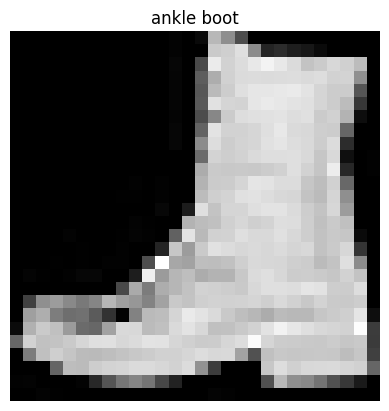

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# np.random.seed(0)

idx = np.random.randint(X_train.shape[0])

plt.imshow(X_train[idx], cmap='gray')
plt.title(label_class[y_train[idx]])
plt.axis('off')
plt.show()



Make the data preparation and preprocessing: scale and reshape the data, put the labels to the good shape.

In [3]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoded format
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Rescale pixel values to the range [0, 1]
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Reshape the image data and add a channel dimension
X_train_norm = X_train_norm.reshape(-1, 28, 28, 1)
X_test_norm = X_test_norm.reshape(-1, 28, 28, 1)

X_train_norm.shape #Should be (60000, 28, 28, 1)

(60000, 28, 28, 1)

Now build the LeNet5 architecture. You can reuse the one of the course, or try to build it by yourself.

The architecture is the following:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1WteTU2FPIVMkBKmMxGpFm5OjsX-szTbB">
</p>

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense


def lenet5():
    model = Sequential()

    # Layer C1
    model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), name='C1'))
    # Layer S2
    model.add(MaxPooling2D(pool_size=(2, 2), name='S2'))
    # Layer C3
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', name='C3'))
    # Layer S4
    model.add(MaxPooling2D(pool_size=(2, 2), name='S4'))
    # Before going into layer C5, we flatten our units
    model.add(Flatten())
    # Layer C5
    model.add(Dense(units=120, activation='relu', name='C5'))
    # Layer F6
    model.add(Dense(units=84, activation='relu', name='F6'))
    # Output layer
    model.add(Dense(units=10, activation='softmax'))

    return model


Now compile and fit your model on your training data. Since this is a multiclass classification, the loss is not `binary_crossentropy` anymore, but `categorical_crossentropy`.

In [6]:
import os
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# Instantiate the LeNet-5 model
model = lenet5()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=10)]

# Fit the model
model.fit(x=X_train_norm, y=y_train_cat, validation_data=(X_test_norm, y_test_cat), epochs=100, batch_size=2048, callbacks=callbacks)


/home/talha-pervez/detectron2_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


2024-05-20 00:07:29.197884: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-05-20 00:07:34.739854: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33226752 exceeds 10% of free system memory.
2024-05-20 00:07:35.275528: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22032648 exceeds 10% of free system memory.
2024-05-20 00:07:35.276331: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22032648 exceeds 10% of free system memory.
2024-05-20 00:07:35.501470: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33226752 exceeds 10% of free system memory.


30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 700ms/step - accuracy: 0.4084 - loss: 1.9851 - val_accuracy: 0.7227 - val_loss: 0.8282
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 519ms/step - accuracy: 0.7350 - loss: 0.7369 - val_accuracy: 0.7628 - val_loss: 0.6304
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 458ms/step - accuracy: 0.7768 - loss: 0.5907 - val_accuracy: 0.7879 - val_loss: 0.5592
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 489ms/step - accuracy: 0.8013 - loss: 0.5300 - val_accuracy: 0.8106 - val_loss: 0.5117
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 519ms/step - accuracy: 0.8228 - loss: 0.4848 - val_accuracy: 0.8212 - val_loss: 0.4830
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 509ms/step - accuracy: 0.8376 - loss: 0.4518 - val_accuracy: 0.8303 - val_loss: 0.4603
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 514ms/step - accuracy: 0.8420 - loss: 0.4330 - val_accuracy: 0.8321 - val_loss: 0.4562
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 509ms/step - accuracy: 0.8503 - loss: 0.4152 - val_accuracy

Have a look at the tensorboard and see if it gives a deeper understanding of your model.

Compute then the accuracy of your model. Is it better than a regular MLP used before?

In [7]:
# TODO: Compute the accuracy of your model
from sklearn.metrics import accuracy_score

batch_size = 1024
y_pred_train = to_categorical(model.predict(X_train_norm).argmax(axis=1), num_classes=10)
y_pred_test = to_categorical(model.predict(X_test_norm).argmax(axis=1), num_classes=10)


print('accuracy on train with NN:', accuracy_score(y_pred_train, y_train_cat))
print('accuracy on test with NN:', accuracy_score(y_pred_test, y_test_cat))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
accuracy on train with NN: 0.9293
accuracy on test with NN: 0.897


We will now add image augmentation to improve our results, especially we will try to reduce overfitting this way.

To do so, you can use `ImageDataGenerator` from Keras that makes all the work for you (including rescaling), with the following parameter: 
* `horizontal_flip=True`

For more info about how the `ImageDataGenerator` works, you can check out [this article](https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/).

Begin by creating an object `ImageDataGenerator` with this parameter.

In [8]:
# TODO: Instantiate an ImageDataGenerator object
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,       # Randomly rotate images by up to 10 degrees
    width_shift_range=0.1,   # Randomly shift images horizontally by up to 10% of the width
    height_shift_range=0.1,  # Randomly shift images vertically by up to 10% of the height
    shear_range=0.1,         # Randomly shear images
    zoom_range=0.1,          # Randomly zoom images
    horizontal_flip=False,   # Randomly flip images horizontally
    vertical_flip=False,     # Randomly flip images vertically (not typical for MNIST/Fashion MNIST)
    fill_mode='nearest'      # Fill mode for new pixels created during transformations
)

Finally, you can train your model using this generator, with the method `fit_generator` of your model and the method `flow` of your `ImageDataGenerator`.

In [11]:
batch_size = 1024
steps_per_epoch = int(len(X_train_norm) / batch_size)  # Cast to integer

model.fit(
    datagen.flow(X_train_norm, y_train_cat, batch_size=batch_size),
    validation_data=(X_test_norm, y_test_cat),
    callbacks=callbacks,
    steps_per_epoch=steps_per_epoch,
    epochs=100
)



Epoch 1/100


/home/talha-pervez/detectron2_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 42s 566ms/step - accuracy: 0.7651 - loss: 0.6591 - val_accuracy: 0.8768 - val_loss: 0.3392
Epoch 2/100
 1/58 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - accuracy: 0.8105 - loss: 0.5062

2024-05-20 01:25:45.770093: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8105 - loss: 0.5062 - val_accuracy: 0.8729 - val_loss: 0.3431
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 36s 554ms/step - accuracy: 0.8105 - loss: 0.4975 - val_accuracy: 0.8704 - val_loss: 0.3541
Epoch 4/100
 1/58 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.7998 - loss: 0.5050

2024-05-20 01:26:23.545790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7998 - loss: 0.5050 - val_accuracy: 0.8669 - val_loss: 0.3572
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 36s 557ms/step - accuracy: 0.8204 - loss: 0.4718 - val_accuracy: 0.8722 - val_loss: 0.3471
Epoch 6/100
 1/58 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - accuracy: 0.8252 - loss: 0.4886

2024-05-20 01:27:00.959169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8252 - loss: 0.4886 - val_accuracy: 0.8655 - val_loss: 0.3604
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 36s 572ms/step - accuracy: 0.8257 - loss: 0.4600 - val_accuracy: 0.8710 - val_loss: 0.3439
Epoch 8/100
 1/58 ━━━━━━━━━━━━━━━━━━━━ 12s 220ms/step - accuracy: 0.8252 - loss: 0.4523

2024-05-20 01:27:38.923516: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8252 - loss: 0.4523 - val_accuracy: 0.8731 - val_loss: 0.3423
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 45s 712ms/step - accuracy: 0.8315 - loss: 0.4432 - val_accuracy: 0.8778 - val_loss: 0.3367
Epoch 10/100
 1/58 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.8213 - loss: 0.4558

2024-05-20 01:28:25.966381: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8213 - loss: 0.4558 - val_accuracy: 0.8800 - val_loss: 0.3320


Recompute the accuracy of your model, does it improve your performances with data augmentation?

In [12]:
# TODO: Compute the accuracy of your model
from sklearn.metrics import accuracy_score

batch_size=1024
y_pred_train = to_categorical(model.predict(X_train_norm, batch_size=batch_size).argmax(axis=1), num_classes=10)
y_pred_test = to_categorical(model.predict(X_test_norm, batch_size=batch_size).argmax(axis=1), num_classes=10)

print('accuracy on train with NN:', accuracy_score(y_pred_train, y_train_cat))
print('accuracy on test with NN:', accuracy_score(y_pred_test, y_test_cat))

59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
accuracy on train with NN: 0.89975
accuracy on test with NN: 0.88


You can now try to improve even more your results. For example, add more parameters to your `ImageDataGenerator`, play with some hyperparameters, and so on...